In [104]:
import pandas as pd
import seaborn as sns
import numpy as np

In [105]:
path = './data/'

In [113]:
def read_sensor_to_df(apath, sensorcsv, start, end):
    df = pd.read_csv(apath + sensorcsv, names=['timestamp','acc_x','acc_y','acc_z'])
    df = df[start:end].reset_index()
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    start = df['timestamp'].loc[0]
    # keep first, diff in sec --> rolling
    df['time'] = df['timestamp'].apply(lambda x: (x-start)/np.timedelta64(1, 's')).fillna(0)
    #df['gyr_x'] = 0
    #df['gyr_y'] = 1
    #df['gyr_z'] = 2
    df['sample'] = range(len(df))
    return df

#sns.lineplot(data = read_sensor_to_df(path, '44601-scooter-data-raw.csv')[78500:140000])
sensor_id = '44601-scooter-data-raw'
sensor_1 = read_sensor_to_df(path, sensor_id + '.csv', 78500, 140000)
sensor_1[0:101]

,index,timestamp,acc_x,acc_y,acc_z,time,sample
0,78500,2022-10-29 15:19:02.251,0.890625,-0.031250,-0.437500,0.000,0
1,78501,2022-10-29 15:19:02.261,0.875000,-0.046875,-0.437500,0.010,1
2,78502,2022-10-29 15:19:02.271,0.875000,-0.046875,-0.437500,0.020,2
3,78503,2022-10-29 15:19:02.281,0.875000,-0.031250,-0.437500,0.030,3
4,78504,2022-10-29 15:19:02.292,0.875000,-0.031250,-0.437500,0.041,4
...,...,...,...,...,...,...,...
96,78596,2022-10-29 15:19:03.219,0.875000,-0.031250,-0.437500,0.968,96
97,78597,2022-10-29 15:19:03.229,0.875000,-0.046875,-0.437500,0.978,97
98,78598,2022-10-29 15:19:03.239,0.890625,-0.046875,-0.421875,0.988,98
99,78599,2022-10-29 15:19:03.249,0.875000,-0.031250,-0.437500,0.998,99


In [114]:
sensor_1.columns

Index(['index', 'timestamp', 'acc_x', 'acc_y', 'acc_z', 'time', 'sample'], dtype='object')

<AxesSubplot:>

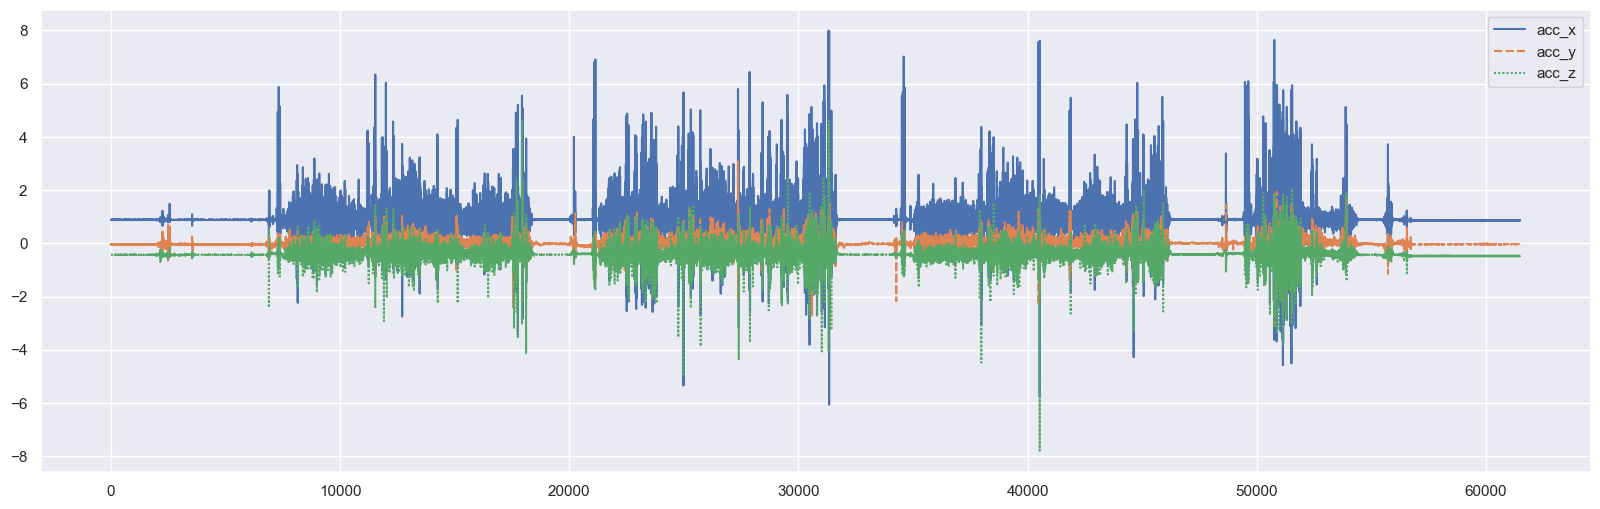

In [115]:
sns.set(rc={'figure.figsize':(20,6)})
sns.lineplot(data = sensor_1[['timestamp', 'acc_x', 'acc_y', 'acc_z', ]])

In [116]:
sensor_1.reset_index().to_csv(path + sensor_id + '_mad.csv', index=False)